## Applications
<hr style="height: 3.0px"/>

Nice discussion on fitting multiple peak data with code:  
https://chrisostrouchov.com/post/peak_fit_xrd_python/  
and the package documentation for lmfit is here:  
https://lmfit.github.io/lmfit-py/

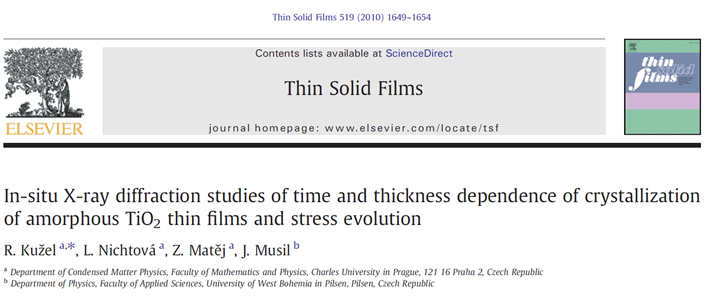

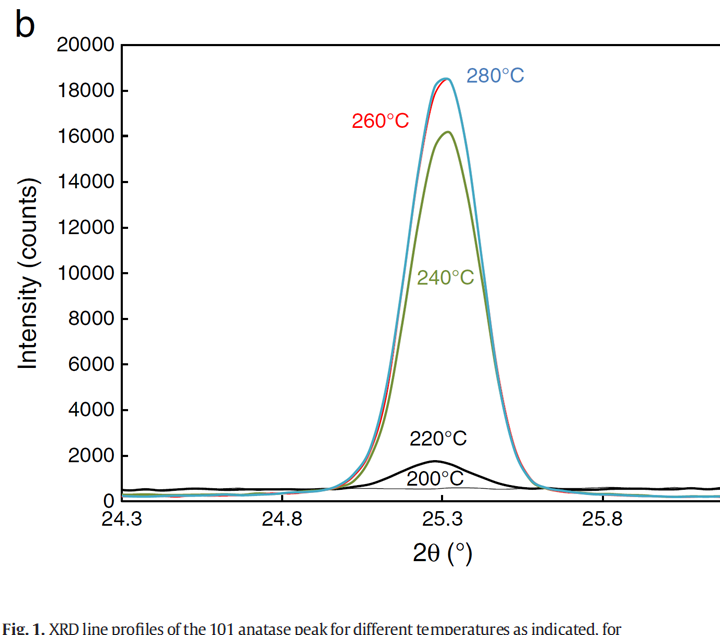

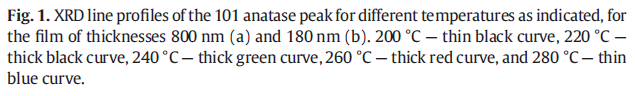

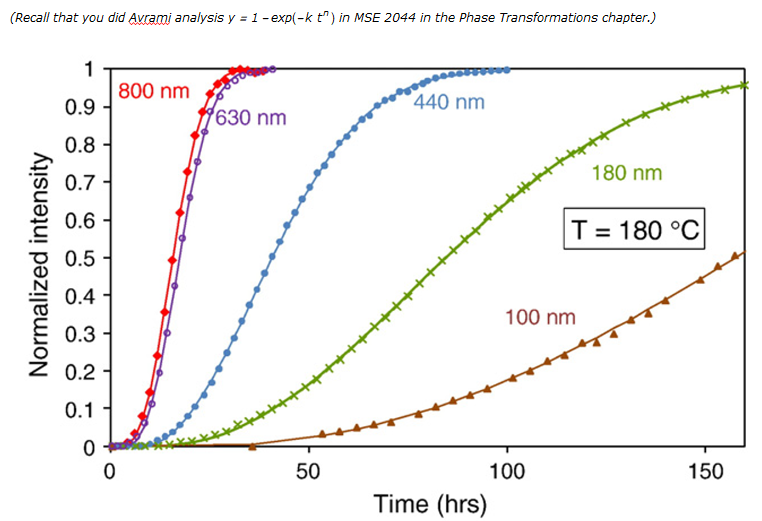

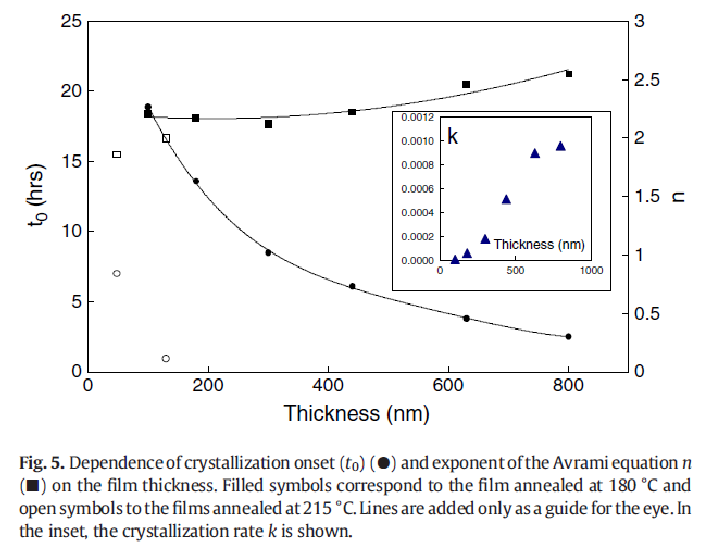

In [224]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import sympy as sym
from sympy import solve
from pathlib import Path
%matplotlib notebook

# pixel data stored in variable "pixel_positions"
def selectdata(image_file):
    
    #now we have 1 row and 2 columns i.e. 2 figures in a row
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(9, 4))
    # gridspec_kw={'width_ratios': [2, 2]} can be used above if needed

    # turn off the x, y axis on the image - the axis doesn't make sense for an image
    ax1.axis(False)
    
    img = mpimg.imread(image_file) #matplotlib

    image_axis = fig.add_axes([0, 0, 0.47, 0.9], zorder=10, anchor=(0.5,0.5)) #zorder places figure on top of anything else in axes
    image_axis.imshow(img)
    image_axis.axis('off')

    # recall from part 1 that image files have coord in left top corner so we need to correct by the y-dimension of the file
    ydim=img.shape[0]

    # setting title and labels for ax1 (figure on the left)
    ax1.set_title('Click on data you want to collect below')
    ax1.set_xlabel('x-pixel position')
    ax1.set_ylabel('y-pixel position')

    global pixel_positions #makes pixel_positions a global variable so we have access to it outside this function
    pixel_positions = []
    def onclick(event):
        if event.button==1:
            pixel_positions.append([event.xdata,ydim-event.ydata])
            ax2.set_title(f'Last click: [{event.xdata:.3f}, {ydim-event.ydata:.3f}]')
            ax2.scatter(event.xdata, ydim-event.ydata,marker='o', c='r', edgecolor='b') #adding scatter plot
        
#         elif event.button==3:
#             fig.canvas.mpl_disconnect(cid)
#             plt.close(fig)
    
    cid=fig.canvas.mpl_connect('button_press_event', onclick) 
    fig.show()
    
# enter pix1, plt1, pix2,etc as an x,y pair e.g. list [x,y] or tuple (x,y)
def cal(pix1, plt1, pix2, plt2, pix3, plt3, datatoconvert):
    
    xpx1, ypx1 = pix1
    x1, y1 = plt1
    xpx2, ypx2 = pix2
    x2, y2 = plt2
    xpx3, ypx3 = pix3
    x3, y3 = plt3
    
    # general solution for calibration constants
    m11=(x1*ypx2 - x1*ypx3 - x2*ypx1 + x2*ypx3 + x3*ypx1 - x3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m12=-(x1*xpx2 - x1*xpx3 - x2*xpx1 + x2*xpx3 + x3*xpx1 - x3*xpx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m21=(y1*ypx2 - y1*ypx3 - y2*ypx1 + y2*ypx3 + y3*ypx1 - y3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m22=-(-xpx1*y2 + xpx1*y3 + xpx2*y1 - xpx2*y3 - xpx3*y1 + xpx3*y2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    Ox=(-x1*xpx2*y3 + x1*xpx3*y2 + x2*xpx1*y3 - x2*xpx3*y1 - x3*xpx1*y2 + x3*xpx2*y1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    Oy=(x1*y2*ypx3 - x1*y3*ypx2 - x2*y1*ypx3 + x2*y3*ypx1 + x3*y1*ypx2 - x3*y2*ypx1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    
    # define our calibrated transf matrix, m_cal, and our calibrated offset, offset_cal
    m_cal=[[m11, m12],[m21,m22]]
    offset_cal=[Ox, Oy]
    
    # return as numpy arrays
    # return(np.array(m_cal), np.array(offset_cal))
    plot_data=np.array([np.matmul(m_cal, point-offset_cal) for point in np.array(datatoconvert)])

    return(plot_data)




<IPython.core.display.Javascript object>


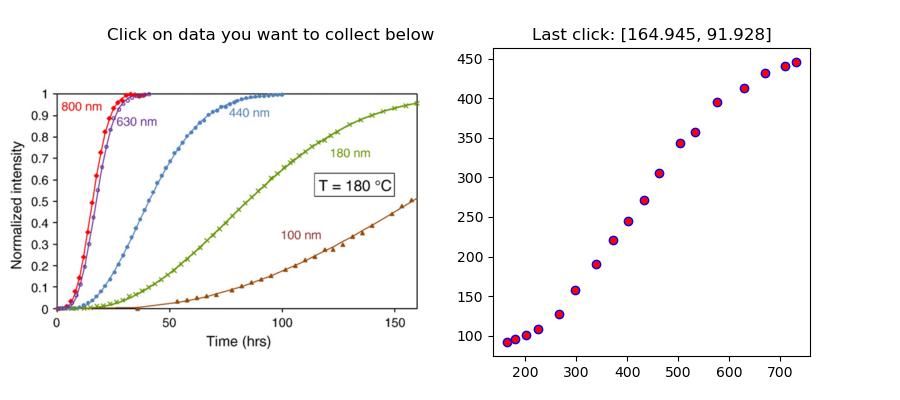

In [225]:
path=Path("C:/Users/sgc/Google Drive/Teaching/2114 & 3114 Math I & II/3114 Python/images/")
filename='crystalliz data intensity time.png'
fullpath=path / filename

selectdata(fullpath)

In [226]:
dataset1=pixel_positions

<IPython.core.display.Javascript object>


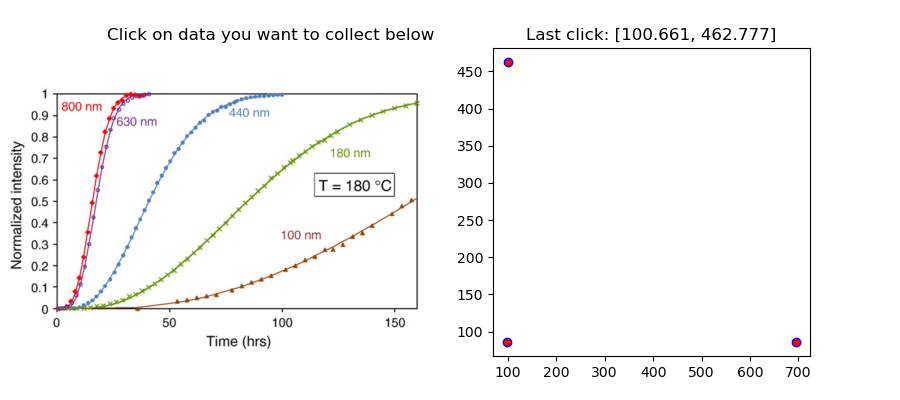

In [232]:
selectdata(fullpath)

In [228]:
dataset2=pixel_positions

<IPython.core.display.Javascript object>


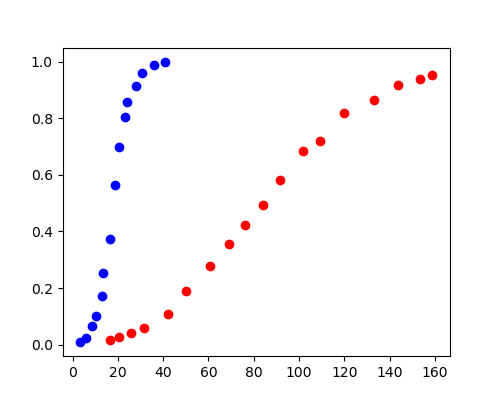

In [234]:
# being a bit more careful and magnifying my window, I got the following calibration values:
plot_data1=cal([694,86], [150,0],[99,86],[0,0],[100,463],[0,1], dataset1)
plot_data2=cal([694,86], [150,0],[99,86],[0,0],[100,463],[0,1], dataset2)
    
plt.subplots(figsize=[5,4])
plt.plot(plot_data1[:,0], plot_data1[:,1], 'ro')
plt.plot(plot_data2[:,0], plot_data2[:,1], 'bo')
plt.show()

In [235]:
dataset1

[[730.3000886524823, 445.93513593380624],
 [709.1653368794326, 440.65144799054383],
 [670.418291962175, 431.8453014184398],
 [628.1487884160756, 412.47177895981093],
 [575.3119089834515, 394.8594858156029],
 [533.0424054373523, 357.873670212766],
 [503.1015070921986, 343.7838356973996],
 [462.5932328605201, 305.0367907801419],
 [432.6523345153664, 271.5734338061466],
 [400.950206855792, 245.1549940898346],
 [372.7705378250591, 220.4977836879433],
 [339.30718085106383, 190.55688534278966],
 [297.0376773049645, 157.0935283687944],
 [265.3355496453901, 127.15263002364071],
 [224.8272754137116, 107.77910756501183],
 [201.93129432624113, 100.73419030732862],
 [180.7965425531915, 95.45050236406621],
 [164.94547872340425, 91.9280437352246]]

In [236]:
dataset2

[[261.81309101654847, 462.7768912529551],
 [242.4395685579196, 459.2544326241135],
 [221.30481678486998, 448.6870567375887],
 [210.73744089834514, 431.0747635933807],
 [194.88637706855792, 409.94001182033105],
 [191.36391843971631, 388.8052600472814],
 [180.7965425531915, 350.0582151300237],
 [173.75162529550826, 298.9825650118204],
 [164.94547872340425, 226.77216312056743],
 [152.61687352245863, 180.9802009456265],
 [150.85564420803783, 151.03930260047287],
 [140.288268321513, 124.62086288416083],
 [133.24335106382978, 110.53102836879435],
 [122.67597517730496, 94.67996453900713],
 [112.10859929078013, 89.39627659574472]]

#### now just need to fit with avrami equation

From your Callister textbook

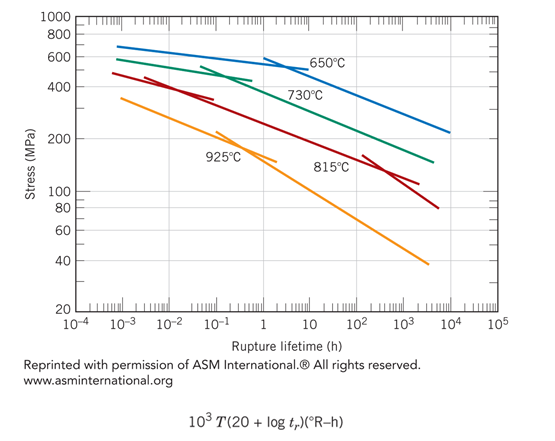

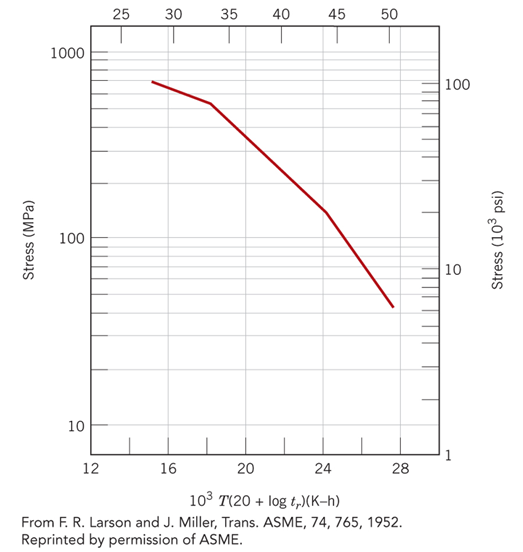

Replot your data from problem 1 to determine the Larson-Miller curve $(Log(\sigma)$ vs T (C + $Log(t_r)$) where $\sigma$ is in MPa, T is in Kelvin, $t_r$ is in hours and to compare to figure 2 let C = 20.  

#### Manually changing "C" parameter and fitting

0.9599405932315405

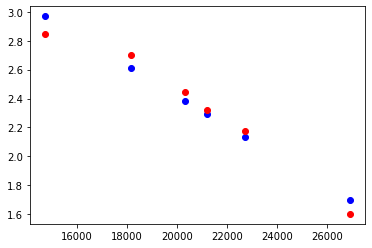

In [206]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, m, b):
    return m*x + b

C=18.975
sigma1=[700, 500, 210]
sigma2=[280, 150, 40]
tr1=[10**(-3),5, 10**4]
tr2=[10**(-2), 1, 3000]
x1=923*(C+np.log10(tr1))
x2=1198*(C+np.log10(tr2))
x=np.append(x1,x2)
y=np.log10(np.append(sigma1,sigma2))

tt=np.array(list(zip(x,y)))
tt=tt[tt[:,0].argsort()] 

x=tt[:,0]
y=tt[:,1]
      
#plt.plot(x,y,'ro')

popt, pcov = curve_fit(func, x, y)

plt.plot(x, func(x, *popt), 'bo')
plt.plot(x, y, 'ro');

residuals = y- func(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

#### Full Fitting Strain Data - Larsen-Miller Data from Callister Chap 8

steps 6 0.007108466823588122
C: 18.972
[ 132780.61097943 -144827.52102558   65654.46339691  -10299.76431337]


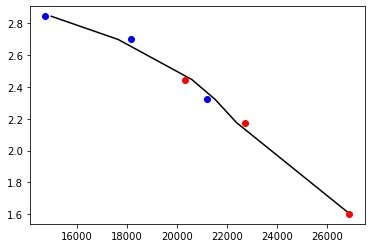

In [223]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, b0, b1, b2, b3):
    return b0+b1*x+b2*x**2+b3*x**3

# def func(x, b0, b1):
#     return b0+b1*x

sigma1=[700, 500, 210]
sigma2=[280, 150, 40]
tr1=[10**(-3),5, 10**4]
tr2=[10**(-2), 1, 3000]

def cost(c):
    #a,b,c = parameters
    global x,y, popt

    x1=923*(c+np.log10(tr1))
    x2=1198*(c+np.log10(tr2))
    x=np.append(x1,x2)
    y=np.log10(np.append(sigma1,sigma2))
    tt=np.array(list(zip(x,y)))
    tt=tt[tt[:,0].argsort()] 
    x=tt[:,0]
    y=tt[:,1]
    popt, pcov = curve_fit(func, y, x)
    residuals = x- func(y, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((x-np.mean(x))**2)
    r_squared = 1 - (ss_res / ss_tot)
    # y has been calculated in previous snippet
    return 1-r_squared

result = optimize.minimize(cost, 1)

print('steps', result.nit, result.fun)
print(f'C: {result.x[0]:3.3f}')
print(popt)

x1f=923*(result.x[0]+np.log10(tr1))
x2f=1198*(result.x[0]+np.log10(tr2))
cfit_data=np.append(x1f,x2f)
yf=np.log10(np.append(sigma1,sigma2))

#plt.plot(cfit_data, yf, 'ro');
plt.plot(func(y, *popt), y,  'k-');
plt.plot(x1f,np.log10(sigma1), 'bo');
plt.plot(x2f,np.log10(sigma2), 'ro');

Peak deconvolution - **see Mathematica notebook 0100** looking at recrystallization kinetics from 
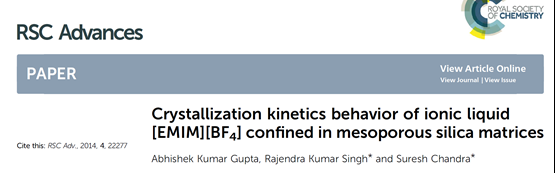

**scipy fit**

[2.55423706 1.35190947 0.47450618]
[2.43708906 1.         0.35015434]


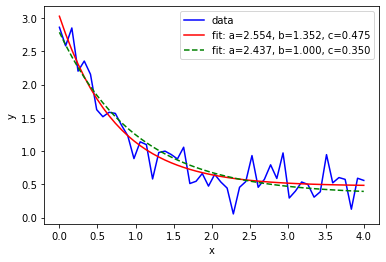

In [77]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c
#Define the data to be fit with some noise:

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
#Fit for the parameters a, b, c of the function func:

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**lmfit package**

In [3]:
# import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal

from lmfit import models

In [4]:
def g(x, A, μ, σ):
    return A / (σ * math.sqrt(2 * math.pi)) * np.exp(-(x-μ)**2 / (2*σ**2))

g_0 = [250.0, 4.0, 5.0]
g_1 = [20.0, -5.0, 1.0]
n = 150
x = np.linspace(-10, 10, n)
y = g(x, *g_0) + g(x, *g_1) + np.random.randn(n)

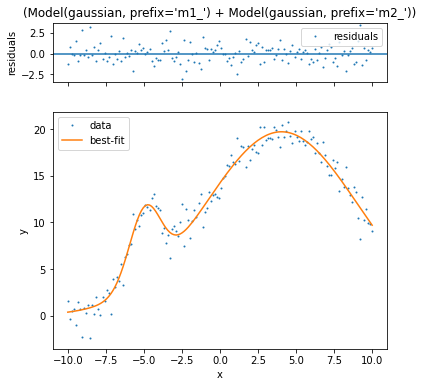

In [6]:
model_1 = models.GaussianModel(prefix='m1_')
model_2 = models.GaussianModel(prefix='m2_')
model = model_1 + model_2

params_1 = model_1.make_params(center=5, sigma=1)
params_2 = model_2.make_params(center=-5, sigma=1)
params = params_1.update(params_2)

output = model.fit(y, params, x=x)
fig, gridspec = output.plot(data_kws={'markersize': 1})
#plot_to_blog(fig, 'xrd-fitting-two-gaussian-noise-lmfit.png')

In [7]:
def generate_model(spec):
    composite_model = None
    params = None
    x = spec['x']
    y = spec['y']
    x_min = np.min(x)
    x_max = np.max(x)
    x_range = x_max - x_min
    y_max = np.max(y)
    for i, basis_func in enumerate(spec['model']):
        prefix = f'm{i}_'
        model = getattr(models, basis_func['type'])(prefix=prefix)
        if basis_func['type'] in ['GaussianModel', 'LorentzianModel', 'VoigtModel']: # for now VoigtModel has gamma constrained to sigma
            model.set_param_hint('sigma', min=1e-6, max=x_range)
            model.set_param_hint('center', min=x_min, max=x_max)
            model.set_param_hint('height', min=1e-6, max=1.1*y_max)
            model.set_param_hint('amplitude', min=1e-6)
            # default guess is horrible!! do not use guess()
            default_params = {
                prefix+'center': x_min + x_range * random.random(),
                prefix+'height': y_max * random.random(),
                prefix+'sigma': x_range * random.random()
            }
        else:
            raise NotImplemented(f'model {basis_func["type"]} not implemented yet')
        if 'help' in basis_func:  # allow override of settings in parameter
            for param, options in basis_func['help'].items():
                model.set_param_hint(param, **options)
        model_params = model.make_params(**default_params, **basis_func.get('params', {}))
        if params is None:
            params = model_params
        else:
            params.update(model_params)
        if composite_model is None:
            composite_model = model
        else:
            composite_model = composite_model + model
    return composite_model, params

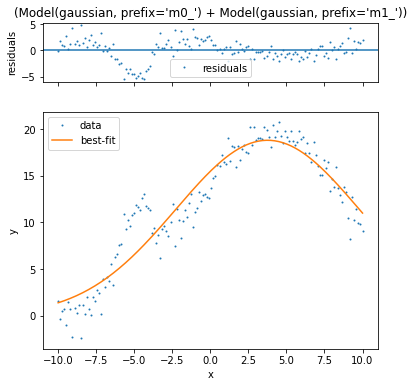

In [8]:
spec = {
    'x': x,
    'y': y,
    'model': [
        {'type': 'GaussianModel'},
        {'type': 'GaussianModel'}
    ]
}

model, params = generate_model(spec)
output = model.fit(spec['y'], params, x=spec['x'])
fig, gridspec = output.plot(data_kws={'markersize': 1})


In [11]:
y

array([ 1.59270366, -0.39958752,  0.54797014,  0.69944379, -0.96151642,
        1.47461535,  0.7123912 , -2.24695157,  0.86726389,  0.33228401,
        1.20294926, -2.3837335 ,  1.14193416,  0.24019319,  1.97720722,
        0.77480408,  0.05117774,  2.05479856,  1.56129363,  2.75689785,
        2.47232065,  0.23725965,  3.96876428,  3.0449432 ,  4.12815535,
        3.72266349,  5.53402311,  3.32901836,  6.33801346,  6.58419059,
        7.62261437,  7.71243603, 10.95047292,  9.26053372, 10.21591512,
        9.59489395, 10.78195383, 10.97020108, 11.9075555 , 11.69411131,
       11.34423761, 12.61345994, 12.99829006, 11.78113153, 11.58698004,
       11.28071372,  8.83049075,  9.43261928,  7.84312909,  8.67897949,
        6.17806292,  9.25395424,  9.59976492,  9.06924817,  8.52969722,
       10.03826752, 11.97681763,  7.42070137, 11.41832135, 10.21800498,
        8.30541397, 10.10828516, 11.29218328, 10.56873114, 12.09933713,
       13.04239771,  9.50496014, 11.13119239, 11.57953365, 13.28

In [9]:
def update_spec_from_peaks(spec, model_indicies, peak_widths=(10, 25), **kwargs):
    x = spec['x']
    y = spec['y']
    x_range = np.max(x) - np.min(x)
    peak_indicies = signal.find_peaks_cwt(y, peak_widths)
    np.random.shuffle(peak_indicies)
    for peak_indicie, model_indicie in zip(peak_indicies.tolist(), model_indicies):
        model = spec['model'][model_indicie]
        if model['type'] in ['GaussianModel', 'LorentzianModel', 'VoigtModel']:
            params = {
                'height': y[peak_indicie],
                'sigma': x_range / len(x) * np.min(peak_widths),
                'center': x[peak_indicie]
            }
            if 'params' in model:
                model.update(params)
            else:
                model['params'] = params
        else:
            raise NotImplemented(f'model {basis_func["type"]} not implemented yet')
    return peak_indicies

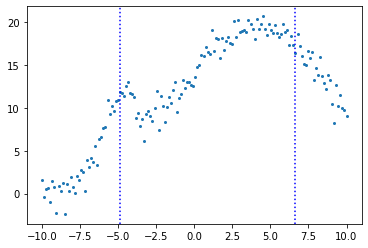

In [27]:
spec = {
    'x': x,
    'y': y,
    'model': [
#         {'type': 'VoigtModel'},
#         {'type': 'VoigtModel'},
#         {'type': 'VoigtModel'},
#         {'type': 'VoigtModel'},
         {'type': 'GaussianModel'},
         {'type': 'GaussianModel'},
#         {'type': 'GaussianModel'},
#         {'type': 'GaussianModel'},
  ]
}

peaks_found = update_spec_from_peaks(spec, [0, 1, 2, 3, 4, 5, 6], peak_widths=(15,))
fig, ax = plt.subplots()
ax.scatter(spec['x'], spec['y'], s=4)
for i in peaks_found:
    ax.axvline(x=spec['x'][i], c='blue', linestyle='dotted')



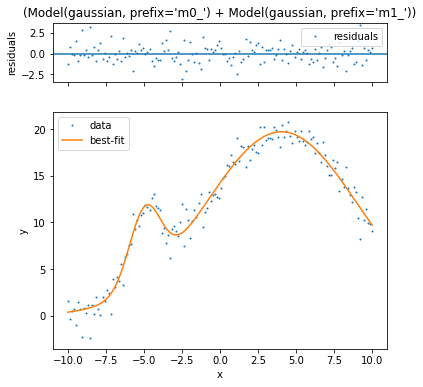

In [28]:
model, params = generate_model(spec)
output = model.fit(spec['y'], params, x=spec['x'])
fig, gridspec = output.plot(data_kws={'markersize':  1})


2


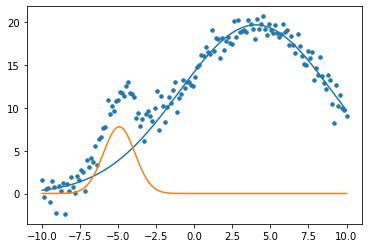

In [40]:
fig, ax = plt.subplots()
ax.scatter(spec['x'], spec['y'], s=12)
components = output.eval_components(x=spec['x'])
print(len(spec['model']))
for i, model in enumerate(spec['model']):
    ax.plot(spec['x'], components[f'm{i}_'])

In [29]:
def print_best_values(spec, output):
    model_params = {
        'GaussianModel':   ['amplitude', 'sigma'],
        'LorentzianModel': ['amplitude', 'sigma'],
        'VoigtModel':      ['amplitude', 'sigma', 'gamma']
    }
    best_values = output.best_values
    print('center    model   amplitude     sigma      gamma')
    for i, model in enumerate(spec['model']):
        prefix = f'm{i}_'
        values = ', '.join(f'{best_values[prefix+param]:8.3f}' for param in model_params[model["type"]])
        print(f'[{best_values[prefix+"center"]:3.3f}] {model["type"]:16}: {values}')

In [30]:
print_best_values(spec, output)

center    model   amplitude     sigma      gamma
[4.040] GaussianModel   :  247.213,    5.005
[-4.938] GaussianModel   :   20.194,    1.032


g_0 = [250.0, 4.0, 5.0]
g_1 = [20.0, -5.0, 1.0]

In [31]:
spec

{'x': array([-10.        ,  -9.86577181,  -9.73154362,  -9.59731544,
         -9.46308725,  -9.32885906,  -9.19463087,  -9.06040268,
         -8.9261745 ,  -8.79194631,  -8.65771812,  -8.52348993,
         -8.38926174,  -8.25503356,  -8.12080537,  -7.98657718,
         -7.85234899,  -7.71812081,  -7.58389262,  -7.44966443,
         -7.31543624,  -7.18120805,  -7.04697987,  -6.91275168,
         -6.77852349,  -6.6442953 ,  -6.51006711,  -6.37583893,
         -6.24161074,  -6.10738255,  -5.97315436,  -5.83892617,
         -5.70469799,  -5.5704698 ,  -5.43624161,  -5.30201342,
         -5.16778523,  -5.03355705,  -4.89932886,  -4.76510067,
         -4.63087248,  -4.4966443 ,  -4.36241611,  -4.22818792,
         -4.09395973,  -3.95973154,  -3.82550336,  -3.69127517,
         -3.55704698,  -3.42281879,  -3.2885906 ,  -3.15436242,
         -3.02013423,  -2.88590604,  -2.75167785,  -2.61744966,
         -2.48322148,  -2.34899329,  -2.2147651 ,  -2.08053691,
         -1.94630872,  -1.81208054,

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 39
    # data points      = 150
    # variables        = 3
    chi-square         = 619.780428
    reduced chi-square = 4.21619339
    Akaike info crit   = 218.809496
    Bayesian info crit = 227.841402
[[Variables]]
    amp:  283.989536 +/- 6.14361004 (2.16%) (init = 5)
    cen:  3.75923378 +/- 0.14212395 (3.78%) (init = 5)
    wid:  6.02833949 +/- 0.16060222 (2.66%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.804
    C(cen, wid) =  0.487
    C(amp, cen) =  0.474


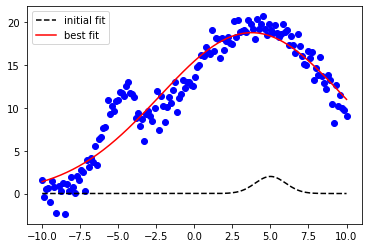

In [57]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

#data = loadtxt('model1d_gauss.dat')
#x = data[:, 0]
#y = data[:, 1]


def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=5, cen=5, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()

**plot a model without fitting data**

In [68]:
from numpy import exp, linspace, random

def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)

from lmfit import Model

#gmodel = Model(gaussian)  # use internal model below or define your own -- this line
gmodel=models.GaussianModel()

params = gmodel.make_params()

In [69]:
gmodel

<lmfit.Model: Model(gaussian)>

In [72]:
#params = gmodel.make_params(cen=5, amp=200, wid=1) #names of defined function
params = gmodel.make_params(center=5, amplitude=200, sigma=1) #names in internal model
params

name,value,initial value,min,max,vary,expression
amplitude,200.000000,None,-inf,inf,True,
center,5.00000000,None,-inf,inf,True,
sigma,1.00000000,None,0.00000000,inf,True,
fwhm,2.35482000,None,-inf,inf,False,2.3548200*sigma
height,79.7884600,None,-inf,inf,False,"0.3989423*amplitude/max(2.220446049250313e-16, sigma)"


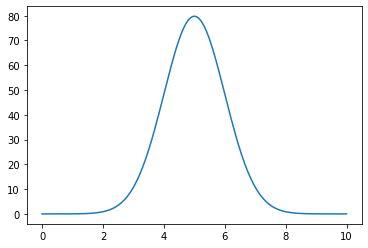

In [73]:
x_eval = np.linspace(0, 10, 201)
y_eval = gmodel.eval(params, x=x_eval)

plt.plot(x_eval, y_eval)